# Consumer Behaviour and Shopping Habits Dataset

###  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm  

###  Reading Data from a CSV File

In [2]:
import pandas as pd

ddata = pd.read_csv("C://Users//deepi/Downloads/shopping.csv")     
ddata

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


### Exploring Data

In [43]:
ddata.shape   # there are 3900 rows and 19 columns  

(3900, 19)

In [64]:
# The total number of entries (rows) in the DataFrame.
# The data types of each column (int64, float64, object, etc.).
# The count of non-null values in each column, which helps identify missing data or incomplete records.

ddata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Co

In [44]:
ddata.isnull().sum() # calculates the total number of missing values (NaNs) in the DataFrame 

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [45]:
ddata.columns #  retrieves the list of column names present in the DataFrame

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [60]:
ddata = ddata.drop(["Customer ID"],axis = 1) # drop customer id
ddata 


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [17]:
# List of columns to check unique values
columns_to_check = ["Item Purchased","Category","Location","Color","Season","Payment Method","Shipping Type","Preferred Payment Method","Frequency of Purchases"]

# Iterate over each column and print unique values
for column in columns_to_check:
    unique_values = ddata[column].unique()
    print(f'Unique values in {column}: {unique_values}\n')


Unique values in Item Purchased: ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Unique values in Category: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

Unique values in Location: ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']

Unique values in Color: ['Gray' 'Maroon' 'Turquoise

In [61]:
ddata.nunique() #returns the number of unique values in each column of the DataFrame 

Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Payment Method               6
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Preferred Payment Method     6
Frequency of Purchases       7
dtype: int64

In [65]:
# Standard deviation, minimum, maximum, and quartile values (25%, 50%, 75%) that provide insights into the distribution 
# and spread of the data in each numerical column.

ddata.describe() 

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [67]:
ddata["Item Purchased"].value_counts() # excludes NaN values
# function returns object containing counts of unique values.

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

In [60]:
import pandas as pd

# Calculate value counts for 'Shipping Type' and 'Frequency of Purchases'
shipping_type_counts = ddata['Shipping Type'].value_counts()
print(shipping_type_counts)
frequency_of_purchases_counts = ddata['Frequency of Purchases'].value_counts()

# Create pivot tables directly from value counts, specifying an index
shipping_type_pivot = pd.pivot_table(pd.DataFrame({'Count': shipping_type_counts}), 
                                     values='Count', index=shipping_type_counts.index, aggfunc='sum')
frequency_of_purchases_pivot = pd.pivot_table(pd.DataFrame({'Count': frequency_of_purchases_counts}), 
                                              values='Count', index=frequency_of_purchases_counts.index, aggfunc='sum') 




Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64


In [62]:
shipping_type_pivot

,Count
Shipping Type,
2-Day Shipping,627
Express,646
Free Shipping,675
Next Day Air,648
Standard,654
Store Pickup,650


In [63]:
frequency_of_purchases_pivot

,Count
Frequency of Purchases,
Annually,572
Bi-Weekly,547
Every 3 Months,584
Fortnightly,542
Monthly,553
Quarterly,563
Weekly,539


### Visualizing Data

## Pie Chart

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


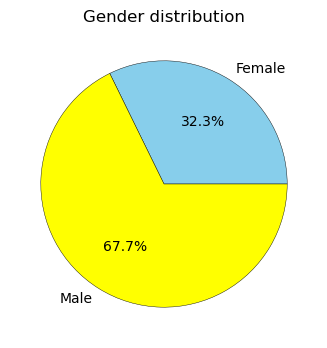

In [65]:
gender_purchase = ddata.groupby('Gender')['Purchase Amount (USD)'].sum()
print(gender_purchase)

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.pie(gender_purchase, labels=gender_purchase.index, autopct='%1.1f%%', colors=['skyblue', 'yellow'], wedgeprops={ 'linewidth':0.3,'edgecolor':'black'})
ax.set_title("Gender distribution")
plt.show() 

##  Inference

##### 	- Yellow Segment (67.7%): Represents the percentage of purchases made by male customers.
##### 	- Blue Segment (32.3%): Represents the percentage of purchases made by female customers.
#####   - Males are more active and There is potential to increase engagement and sales among female customers.
#####   - This insight provides a basis for businesses to develop targeted strategies aimed at engaging female customers more effectively, ultimately 
##### striving for a balanced and inclusive market presence

###  Bar chart (age group distribution)

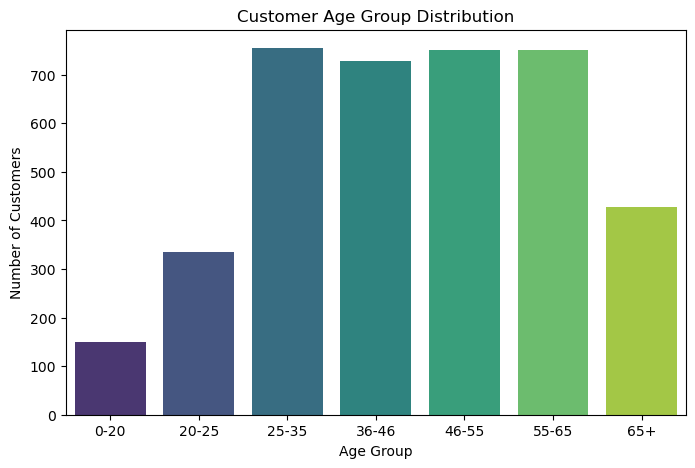

In [16]:
# to Define bins and labels for age groups
bins = [ 0 ,20, 25, 35, 45, 55, 65,100]
labels = ['0-20','20-25', '25-35', '36-46', '46-55', '55-65', '65+']

#Create a new column 'Age Group' based on 'Age' column using binning
ddata['Age Group'] = pd.cut(ddata['Age'],bins = bins,labels = labels, right=False) 


# Plot the age groups 
plt.figure(figsize=(8, 5))
sns.countplot(data=ddata, x='Age Group', palette='viridis', order=labels) 
plt.title('Customer Age Group Distribution')
plt.xlabel('Age Group') 
plt.ylabel('Number of Customers')  
plt.show()    


#### Inference

##### The 26-35 age group has the highest number of customers, with around 750 individuals.
##### This age group is the most active in terms of shopping, making them a key target demographic for marketing strategies.
##### The 36-45, 46-55, and 56-65 age groups each have around 700 customers.
##### Businesses should focus on maintaining engagement with the dominant age groups while exploring strategies to increase participation from younger and older customers.


# Count plot

### Purchase Frequency by Season and Category

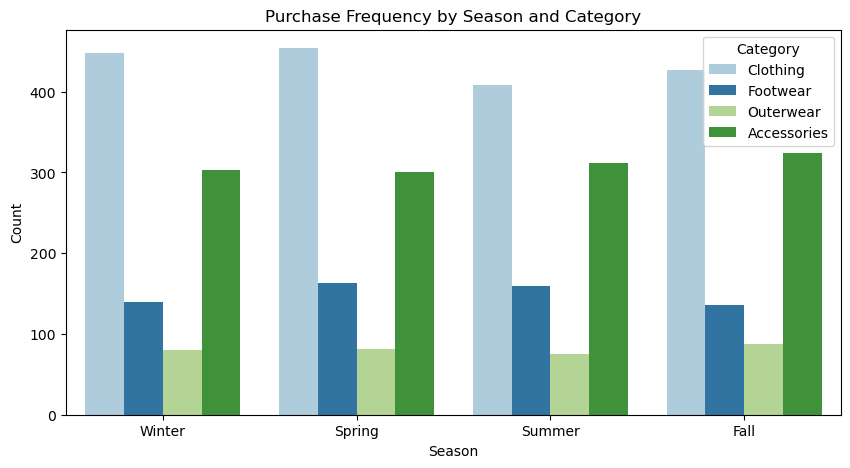

In [7]:
data = pd.DataFrame(ddata)

# Custom color palette
custom_palette = sns.color_palette("Paired") 

# Create count plot with hue and custom palette
plt.figure(figsize=(10, 5))
sns.countplot(x='Season', hue='Category', data=ddata, palette=custom_palette)
plt.title('Purchase Frequency by Season and Category')
plt.xlabel('Season')
plt.ylabel('Count') 
plt.legend(title='Category') 
plt.show()

## Inference

##### Clothing dominates the purchase frequency in all seasons, indicating it is the most popular category among the consumers.
##### Clothing purchases peak during Winter and Spring, possibly due to seasonal sales, holidays, or the start of new fashion seasons.##### 	Accessories see higher purchases in warmer seasons (Spring, Summer, Fall), suggesting they might be more popular as complementary items to
#####  seasonal outfits Footwear has a consistent purchase pattern across seasons, indicating a stable demand throughout the year. 
##### Outerwear has the least variability and the lowest count, suggesting it might be a niche category or one with less frequent purchases.



# Bar Plot


#### Customer Distribution by Location

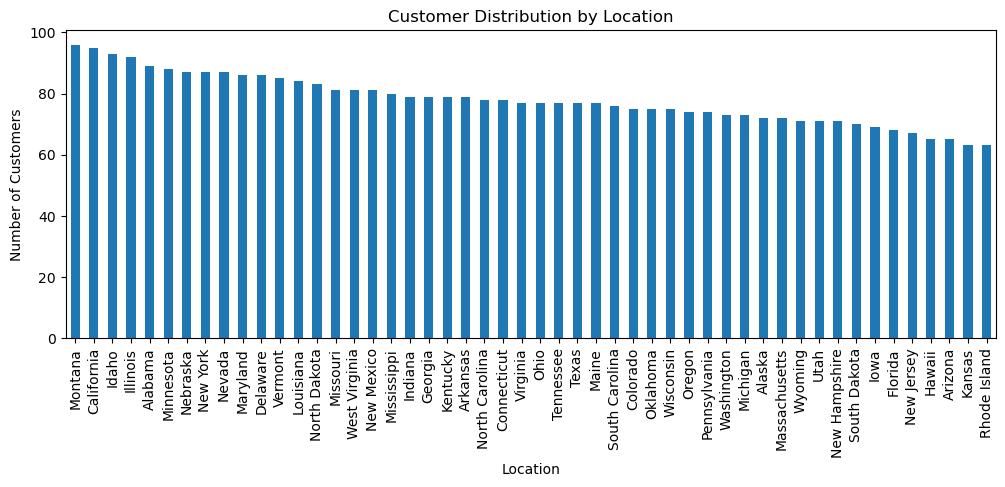

In [9]:
location_counts = ddata["Location"].value_counts()
location_counts.plot(kind="bar", figsize=(12, 4))
plt.title("Customer Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Number of Customers") 
plt.show()

## Inference

##### Each bar represents the number of customers from a specific state.
##### The height of the bar indicates the customer count for that state.
##### There is a gradual decrease in the number of customers as we move from left to right on the chart.
##### Montana and California have the highest number of customers, both close to 100.

## Horizontal Bar Chart

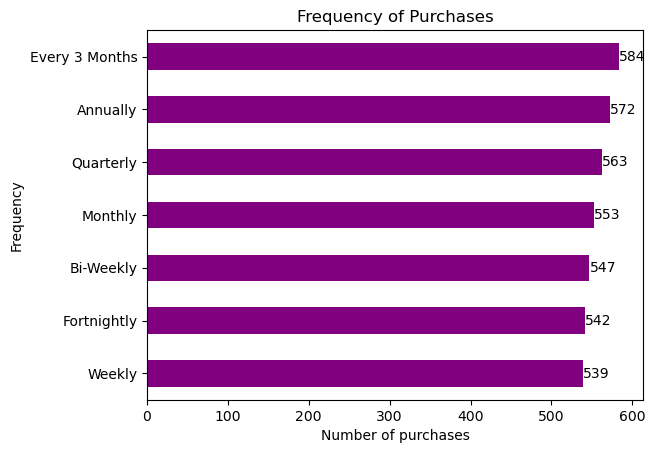

In [74]:
ax = ddata['Frequency of Purchases'].value_counts().sort_values(ascending=True).plot(kind='barh', color='purple', title='Frequency of Purchases')
ax.set_xlabel('Number of purchases')  
ax.set_ylabel('Frequency')
ax.bar_label(ax.containers[0])
plt.show()

##### The data is uniformly distributed across all time intervals, with no single category dominating in terms of purchase frequency.
##### The chart shows that each frequency category has an equal number of purchases
##### The number of purchases in each frequency category appears to be around 600, indicating a consistent purchasing pattern regardless of the time interval.
##### Understanding this uniform behaviour can lead to more effective and tailored approaches to meet the needs of customers who shop at various intervals.

## Labeled Bar Chart

Text(0, 0.5, 'Purchase Amount')

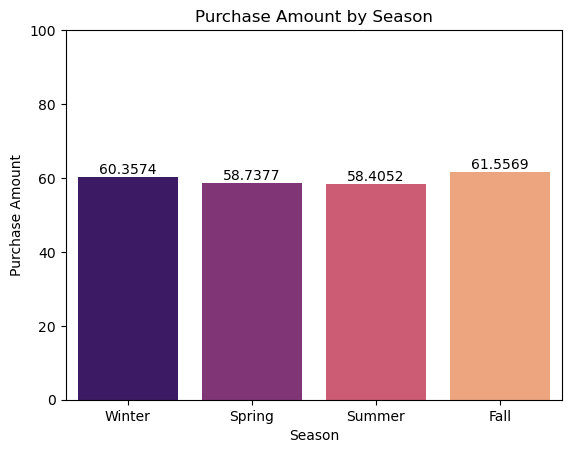

In [76]:
plt.ylim([0,100])
ax =sns.barplot(x = ddata['Season'], y = ddata['Purchase Amount (USD)'],palette='magma', errorbar = None)
ax.bar_label(ax.containers[0])
plt.title("Purchase Amount by Season") 
plt.xlabel("Season") 
plt.ylabel("Purchase Amount")  

## Inference

##### The chart is a bar graph that shows the average purchase amounts across four different seasons: Winter, Spring, Summer, and Fall.
##### Fall has the highest average purchase amount, indicating that consumers tend to spend more during this season.
##### Summer has the lowest average purchase amount, indicating a possible decrease in consumer spending during this time.
##### Both Winter and Fall show higher purchase amounts compared to Spring and Summer.

# Heat Map

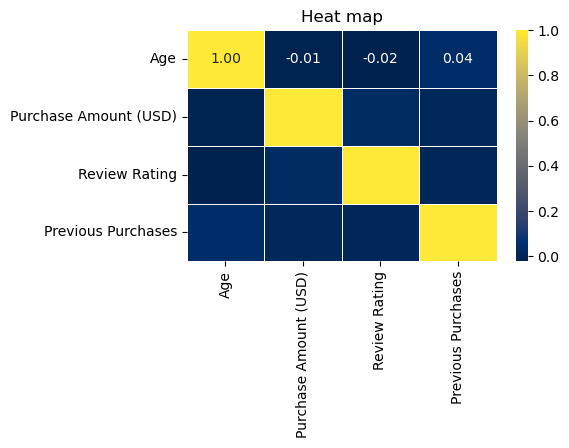

In [10]:
selected_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
df_selected = ddata[selected_columns]

# Compute the correlation matrix 
correlation_matrix = df_selected.corr()
# print(correlation_matrix, "\n")

# Plot the heatmap
plt.figure(figsize = (5, 3))
sns.heatmap(correlation_matrix, annot = True, cmap = 'cividis', linewidth = .5, fmt = ".2f")
plt.title("Heat map")
plt.show()

### Inference

##### 1.00: Perfect positive correlation (the variables move in the same direction).
##### -0.01: Very weak negative correlation (almost no relationship).
##### -0.02: Very weak negative correlation (almost no relationship).
##### 0.04: Very weak positive correlation (almost no relationship).
##### Most of the variables show very weak correlations with each other, with correlation coefficients close to zero. 
##### This indicates that there is little to no linear relationship between these variables.

# contingency table

In [58]:
# Create a contingency table with margins
contingency_table = pd.crosstab(ddata['Subscription Status'], ddata['Payment Method'], margins=True)

print(contingency_table) 


Payment Method       Bank Transfer  Cash  Credit Card  Debit Card  PayPal  \
Subscription Status                                                         
No                             465   469          502         453     479   
Yes                            167   179          194         180     159   
All                            632   648          696         633     638   

Payment Method       Venmo   All  
Subscription Status               
No                     479  2847  
Yes                    174  1053  
All                    653  3900  


### Pie Chart

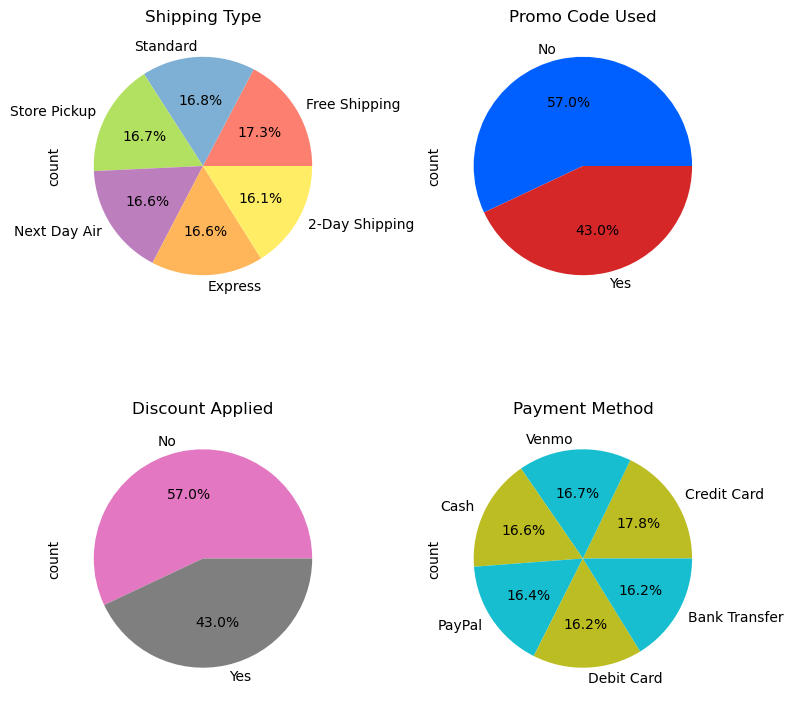

In [13]:
colors_discount = ['#e377c2', '#7f7f7f']  # Example colors for Discount Applied
colors_payment = ['#bcbd22', '#17becf']  # Example colors for Payment Method
custom_colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
custom_colors2 = [ "#0060ff", "#d62728"] 


# Create subplots for each variable
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Shipping Type
ddata['Shipping Type'].value_counts().plot(kind='pie', ax=axes[0, 0], autopct='%1.1f%%', colors=custom_colors)
axes[0, 0].set_title('Shipping Type')

# Promo Code Used
ddata['Promo Code Used'].value_counts().plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%',colors=custom_colors2)
axes[0, 1].set_title('Promo Code Used')

# Discount Applied
ddata['Discount Applied'].value_counts().plot(kind='pie', ax=axes[1, 0], autopct='%1.1f%%',colors=colors_discount) 
axes[1, 0].set_title('Discount Applied')

# Payment Method
ddata['Payment Method'].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%',colors=colors_payment)
axes[1, 1].set_title('Payment Method')

plt.tight_layout()
plt.show()


### Inference

##### --shipping type
##### The choice of shipping type is relatively evenly distributed among the different options, with no single method dominating significantly.
##### --Free Shipping Preference
##### Free shipping is slightly more preferred than other options, indicating that customers are likely attracted to cost-saving opportunities
##### -- promo code (More Non-Users)
##### A higher percentage of customers (57%) did not use promo codes, suggesting either a lack of awareness or availability of promo codes.##### --Discount Applied (Similar to Promo Code Usage)#####  The distribution is identical to the promo code usage, nearly half of the customer base isnot  responsive to discounts.
##### --payment method
##### Credit cards are the most commonly used payment method, highlighting their convenience and widespread acceptance.
#####  Offering multiple payment methods is important to cater to different customer preferences and enhance the shopping experience.
.


# 2 sample independent t test

In [ ]:
hm = 50 # assume # hypothesis mean value 

In [6]:
import numpy as np
import scipy.stats as stats

# creating data groups
male = ddata[ddata["Gender"] == "Male"]
female = ddata[ddata["Gender"] == "Female"]

male_sample = male["Purchase Amount (USD)"]
# print(male_age)

female_sample = female["Purchase Amount (USD)"] 
# print(female_age) 

In [8]:
male_group = np.array(male_sample) # converting it into array numerical python
print(male_group)
female_group = np.array(female_sample) 

# perform the two sample t_test with equal variances
t_stat, p_values= stats.ttest_ind(a=male_group,b=female_group, equal_var =True)
t_stat,p_values


[53 64 73 ... 21 35 43]


(-0.8769152065030424, 0.38058673555268097)

In [10]:
alpha = 0.05

In [13]:
if p_values < alpha:
    print(f"reject the null hypothesis at alpha = {alpha}")
else:
    print(f"fail to reject the null hypothesis at alpha = {alpha}") 

# there is a relationship between age and purchase amount 

    

fail to reject the null hypothesis at alpha = 0.05


# chi square test

In [13]:
contingency_table = pd.crosstab(ddata['Shipping Type'], ddata['Preferred Payment Method'])
# print(contingency_table, "\n")

chiSquareTest = chi2_contingency(contingency_table, correction = False) 

# print(chiSquareTest)

print("Chi Square Statistic:", round(chiSquareTest[0], 2)) 
print("p-value:", round(chiSquareTest[1], 4))
print("Degrees of Freedom (DOF):", chiSquareTest[2]) # calculate number of rows and columns ,Degrees of Freedom (DOF)=(R−1)×(C−1)
print("Excepted Frequency:", np.round(chiSquareTest[3], 2)) 

# fail to reject the  null hypothesis. ,so there is a relationship between shipping type and preferred payment method 

Chi Square Statistic: 19.01
p-value: 0.7968
Degrees of Freedom (DOF): 25
Excepted Frequency: [[ 98.39 107.72 107.88 102.25 108.84 101.93]
 [101.37 110.98 111.15 105.35 112.14 105.02]
 [105.92 115.96 116.13 110.08 117.17 109.73]
 [101.69 111.32 111.49 105.67 112.49 105.34]
 [102.63 112.35 112.52 106.65 113.53 106.32]
 [102.   111.67 111.83 106.   112.83 105.67]]


## Insights from Data

##### ->Montana: Montana has the highest number of purchases, indicating a substantial portion of our customer base.
##### ->Free Shipping: Free shipping services are the most popular among customers, closely followed by standard shipping services. This trend suggests that keeping shipping costs low can attract more customers.
##### ->Seasonal Purchases: Customers tend to make more purchases during winter and fall compared to spring and summer.
#####  ->Promo Codes: The usage of promo codes does not seem to have a significant impact on purchase behaviour
#####  ->Clothing: Clothing is the most popular product category across all consumer demographics.
##### ->Accessories: Accessories are equally popular across age groups, except for those aged 15-25 and 65-75.

